In [ ]:
from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Dữ liệu ban đầu là ảnh xám
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
# Normalization dữ liệu trong phạm vi [0,1]
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
# Tập train từ 55000 ,tập valid 5000
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [ ]:
X_train.shape

(55000, 28, 28)

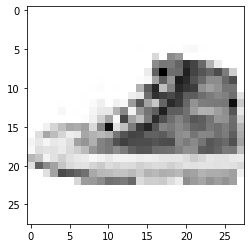

In [ ]:
plt.imshow(X_train[2], cmap="binary")
plt.show()

In [ ]:
y_train[2]

7

In [ ]:
names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat","Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
names[y_train[2]]

'Sneaker'

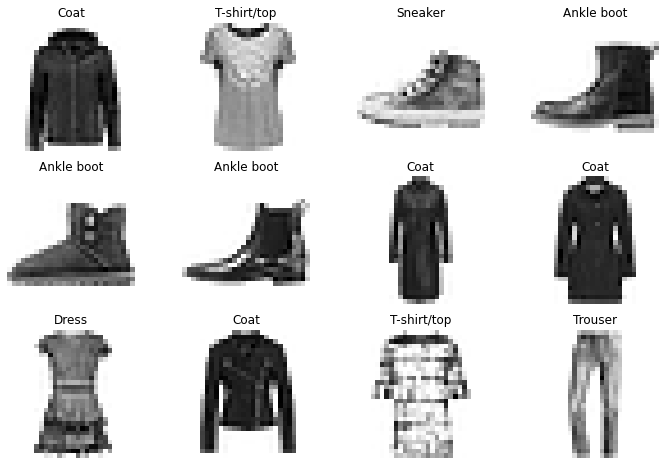

In [ ]:
plt.figure(figsize=(12,8))
for i in range(3):
  for j in range(4):
    index=4*i+j
    plt.subplot(3,4,index+1)
    plt.imshow(X_train[index],cmap='binary')
    plt.title(names[y_train[index]])
    plt.axis('off')

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
opitimizersss=keras.optimizers.SGD(learning_rate=1e-3)
model.compile(optimizer=opitimizersss,loss="sparse_categorical_crossentropy",metrics="accuracy",)

In [ ]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 7s 4ms/step - loss: 1.2819 - accuracy: 0.6229 - val_loss: 0.8886 - val_accuracy: 0.7160
Epoch 2/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.7955 - accuracy: 0.7361 - val_loss: 0.7130 - val_accuracy: 0.7656
Epoch 3/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.6816 - accuracy: 0.7721 - val_loss: 0.6427 - val_accuracy: 0.7900
Epoch 4/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.6217 - accuracy: 0.7944 - val_loss: 0.5900 - val_accuracy: 0.8064
Epoch 5/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5832 - accuracy: 0.8074 - val_loss: 0.5582 - val_accuracy: 0.8200
Epoch 6/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5553 - accuracy: 0.8156 - val_loss: 0.5350 - val_accuracy: 0.8238
Epoch 7/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5339 - accuracy: 0.8223 - val_loss: 0.5156 - val_accuracy:

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 batch_normalization (BatchN  (None, 784)              3136      
 ormalization)                                                   
                                                                 
 dense_9 (Dense)             (None, 300)               235500    
                                                                 
 batch_normalization_1 (Batc  (None, 300)              1200      
 hNormalization)                                                 
                                                                 
 dense_10 (Dense)            (None, 100)               30100     
                                                                 
 batch_normalization_2 (Batc  (None, 100)             

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, epochs=5,
                    validation_data=(X_valid, y_valid))

Epoch 1/5
1719/1719 [==============================] - 11s 6ms/step - loss: 0.8293 - accuracy: 0.7222 - val_loss: 0.5539 - val_accuracy: 0.8156
Epoch 2/5
1719/1719 [==============================] - 10s 6ms/step - loss: 0.5703 - accuracy: 0.8036 - val_loss: 0.4792 - val_accuracy: 0.8380
Epoch 3/5
1719/1719 [==============================] - 10s 6ms/step - loss: 0.5161 - accuracy: 0.8215 - val_loss: 0.4425 - val_accuracy: 0.8496
Epoch 4/5
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4788 - accuracy: 0.8315 - val_loss: 0.4214 - val_accuracy: 0.8560
Epoch 5/5
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4547 - accuracy: 0.8405 - val_loss: 0.4051 - val_accuracy: 0.8616


In [ ]:
optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)
optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True)
optimizer = keras.optimizers.Adagrad(learning_rate=0.001)
optimizer = keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)
optimizer = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
optimizer = keras.optimizers.Adamax(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
optimizer = keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

In [ ]:
optimizer = keras.optimizers.SGD(learning_rate=0.01, decay=1e-4)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, epochs=5,
                    validation_data=(X_valid, y_valid))

Epoch 1/5
1719/1719 [==============================] - 11s 6ms/step - loss: 0.5335 - accuracy: 0.8135 - val_loss: 0.4072 - val_accuracy: 0.8588
Epoch 2/5
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4307 - accuracy: 0.8474 - val_loss: 0.3810 - val_accuracy: 0.8690
Epoch 3/5
1719/1719 [==============================] - 11s 6ms/step - loss: 0.4038 - accuracy: 0.8561 - val_loss: 0.3815 - val_accuracy: 0.8702
Epoch 4/5
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3801 - accuracy: 0.8661 - val_loss: 0.3618 - val_accuracy: 0.8764
Epoch 5/5
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3657 - accuracy: 0.8701 - val_loss: 0.3505 - val_accuracy: 0.8758


In [ ]:
def exponential_decay_fn(epoch):
    return 0.01 * 0.1**(epoch / 20)

In [ ]:
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1**(epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(lr0=0.01, s=20)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)
history = model.fit(X_train, y_train, epochs=5,
                    validation_data=(X_valid, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/5
1719/1719 [==============================] - 13s 7ms/step - loss: 0.7244 - accuracy: 0.7625 - val_loss: 0.9738 - val_accuracy: 0.7288 - lr: 0.0100
Epoch 2/5
1719/1719 [==============================] - 11s 7ms/step - loss: 0.5179 - accuracy: 0.8245 - val_loss: 0.4838 - val_accuracy: 0.8284 - lr: 0.0089
Epoch 3/5
1719/1719 [==============================] - 11s 7ms/step - loss: 0.4464 - accuracy: 0.8475 - val_loss: 0.5948 - val_accuracy: 0.8162 - lr: 0.0079
Epoch 4/5
1719/1719 [==============================] - 12s 7ms/step - loss: 0.4084 - accuracy: 0.8605 - val_loss: 0.4023 - val_accuracy: 0.8664 - lr: 0.0071
Epoch 5/5
1719/1719 [==============================] - 11s 7ms/step - loss: 0.3792 - accuracy: 0.8697 - val_loss: 0.3691 - val_accuracy: 0.8800 - lr: 0.0063


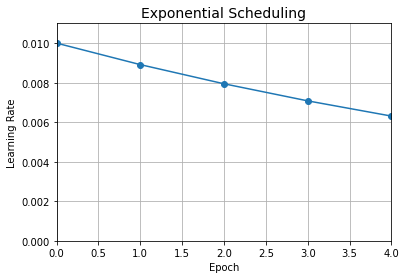

In [ ]:
plt.plot(history.epoch, history.history["lr"], "o-")
plt.axis([0, 5 - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling", fontsize=14)
plt.grid(True)
plt.show()

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="elu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(100, activation="elu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(10, activation="softmax",
                       kernel_regularizer=keras.regularizers.l2(0.01))
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=5,
                    validation_data=(X_valid, y_valid))

Epoch 1/5
1719/1719 [==============================] - 15s 8ms/step - loss: 1.5621 - accuracy: 0.7783 - val_loss: 1.0072 - val_accuracy: 0.7678
Epoch 2/5
1719/1719 [==============================] - 14s 8ms/step - loss: 0.9067 - accuracy: 0.7949 - val_loss: 0.8497 - val_accuracy: 0.8224
Epoch 3/5
1719/1719 [==============================] - 14s 8ms/step - loss: 0.8856 - accuracy: 0.8054 - val_loss: 1.0035 - val_accuracy: 0.7400
Epoch 4/5
1719/1719 [==============================] - 14s 8ms/step - loss: 0.8772 - accuracy: 0.8088 - val_loss: 0.8519 - val_accuracy: 0.8216
Epoch 5/5
1719/1719 [==============================] - 14s 8ms/step - loss: 0.8740 - accuracy: 0.8103 - val_loss: 0.8396 - val_accuracy: 0.8286


In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=5,
                    validation_data=(X_valid, y_valid))

Epoch 1/5
1719/1719 [==============================] - 14s 8ms/step - loss: 0.5854 - accuracy: 0.7883 - val_loss: 0.4193 - val_accuracy: 0.8464
Epoch 2/5
1719/1719 [==============================] - 13s 7ms/step - loss: 0.4545 - accuracy: 0.8325 - val_loss: 0.3663 - val_accuracy: 0.8638
Epoch 3/5
1719/1719 [==============================] - 13s 7ms/step - loss: 0.4187 - accuracy: 0.8439 - val_loss: 0.3871 - val_accuracy: 0.8556
Epoch 4/5
1719/1719 [==============================] - 13s 7ms/step - loss: 0.3978 - accuracy: 0.8523 - val_loss: 0.3270 - val_accuracy: 0.8798
Epoch 5/5
1719/1719 [==============================] - 13s 7ms/step - loss: 0.3818 - accuracy: 0.8568 - val_loss: 0.3200 - val_accuracy: 0.8806


In [ ]:
from functools import partial
MaxNormDense = partial(keras.layers.Dense,
                       activation="selu", kernel_initializer="lecun_normal",
                       kernel_constraint=keras.constraints.max_norm(1.))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    MaxNormDense(300),
    MaxNormDense(100),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))